## Filtros de Partículas

Ver video [aquí](https://www.youtube.com/watch?v=vm9h0UPwn5k)

Tenemos un robot al que queremos posicionar. El robot no tiene un sensor explícito de la posición, pero sí tiene un sensor que le da la distancia a cada una de las cuatro balizas que hay en nuestro escenario. El sensor no es preciso y tiene un cierto ruido pero conocemos la posición exacta de las balizas. Asumimos que el ruido de las mediciones siguen una distribución normal $\backsim N(0,\sigma)$ (con media $0$ y desviación estándar $\sigma$).

El robot tiene tres coordenadas $x \in [0,100]$, $y \in [0,100]$, $heading \in [0, 2\pi]$ y recibe órdenes para avanzar en linea recta en la dirección en la que está apuntando y para girar.

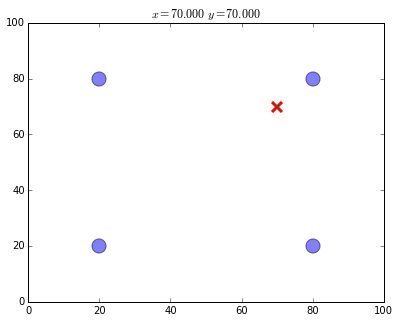

In [31]:
from IPython.display import Image
Image(filename='imgs/world1.png')

Creamos un conjunto de partículas $P = \{p_i\}$ con posiciones aleatorias. Las partículas se comportan como nuestro robot, se mueven conjuntamente con el robot y tienen el mismo ruido en la medición de su distancia a los sensores. La intuición es que las partículas cuya posición es compatible con la de nuestro robot tienen más probabilidad de haber realizado la misma medición a las balizas. En la figura siguiente, la cruz verde representa el promedio de las posiciones de todas las partículas

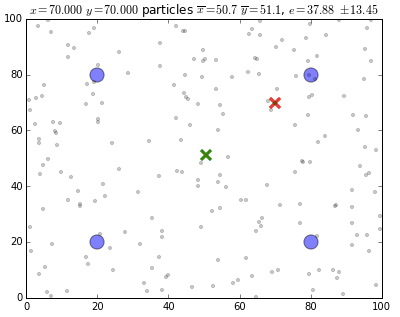

In [32]:
Image(filename='imgs/world2.png')

Para un instante determinado de tiempo, nuestro robot mide su distancia (imprecisa) a las cuatro balizas: $d^r = \{d^r_1, d^r_2, d^r_3, d^r_4 \}$. Según avanza el tiempo y el robot se mueve las partículas se mueven con los mismos comandos, y nos vamos quedando con las partículas cuya configuración sea más compatible con el robot. Para cada instante de tiempo, esto se hace en los siguientes pasos:


###Paso 1. Probabilidades de la medición
Para cada partícula $p$ y cada baliza calcularmos la probabilidad de que haber realizado la misma medición que nuestro robot. Las distancias de cada una de las balizas son: $d^p = \{ d^p_1, d^p_2, d^p_3, d^p_4 \}$.

Para la baliza $i$, la distancia de una partícula $p$ a dicha baliza sigue una distribución normal $\backsim N(d^p_i,\sigma)$. Recordemos que la función de densidad de probabilidad de una normal $\backsim N(\mu, \sigma)$ viene dada por:

$$P[\mu,\sigma](x) = \frac{1}{\sigma\sqrt{2\pi}} e ^ \frac{-(\mu-x)^2}{\sigma^2}$$

por tanto la probabilidad de que dicha partícula haya obtenido la medición que obtuvo el robot viene dada por:

$$P[d^p_i,\sigma](d^r_i)$$

y la probabilidad conjunta de que dicha partícula haya obtenido todas las mediciones del robot viene dada por:

$$P(d^p \; | \; d^r) = \prod_{i=1}^4 P[d^p_i,\sigma](d^r_i)$$

###Paso 2. Muestreo de partículas
Obtenido $P(d^p \; | \; d^r)$ para cada partícula, procedemos a remuestrear el conjunto de partículas, seleccionando con reemplazo cada partícula con probabilidad proporcional a $P(d^p \; | \; d^r)$ hasta obtener un nuevo conjunto del mismo número de partículas. 

Observa que en el muestreo, las partículas con más probabilidad serán seleccionadas más frecuentemente y, por tanto, es muy posible que existan varias copias de la misma partícula en el conjunto resultado del muestreo.

En este proceso, según se va iterando por estos pasos, las partículas cuya posición es más incompatible con nuestro roboot van desapareciendo del conjunto.

###Paso 3. Movimiento
Ahora usamos el promedio de las posiciones de las partículas como estimación de la posición del robot. La varianza de esas posiciones nos da también una indicación sobre la confiabilidad que podemos depositar en dicha estimación.

En este momento, realizamos el movimiento del robot usando nuestra estimación, en función del objetivo que queremos alcanzar (p.ej. llegar a un punto concreto de nuestro escenario). Las estrategias que se pueden adoptar en este paso son variadas. Por ejemplo, podemos hacer movimientos aleatorios alrededor de la posición del robot hasta que la variabilidad descienda un cierto umbral para luego empezar a movernos hacia nuestro objetivo.

En cualquier caso, movemos **TODAS** las particulas resultado del muestreo de la misma manera que el robot (avance y giro).

Observa igualmente que de esta manera van sobreviviendo las partículas con **TODOS** los parámetros compatibles con nuestro robot según se mueve. En este caso estoy incluye posición y orientación.

Observa los siguientes ejemplos, con distintas cantidades de balizas.

###Con cuatro balizas

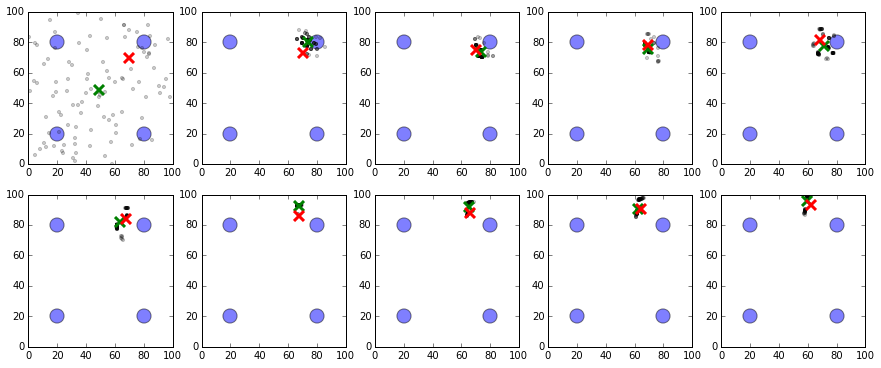

In [38]:
Image(filename='imgs/world-seq1.png')

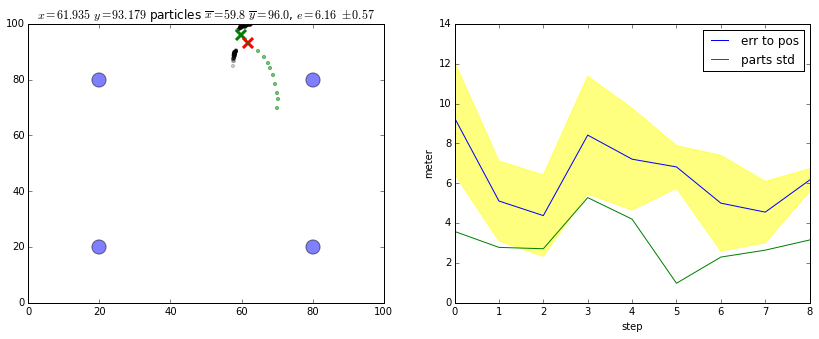

In [39]:
Image(filename='imgs/world-seq1-summary.png')

### Con dos balizas

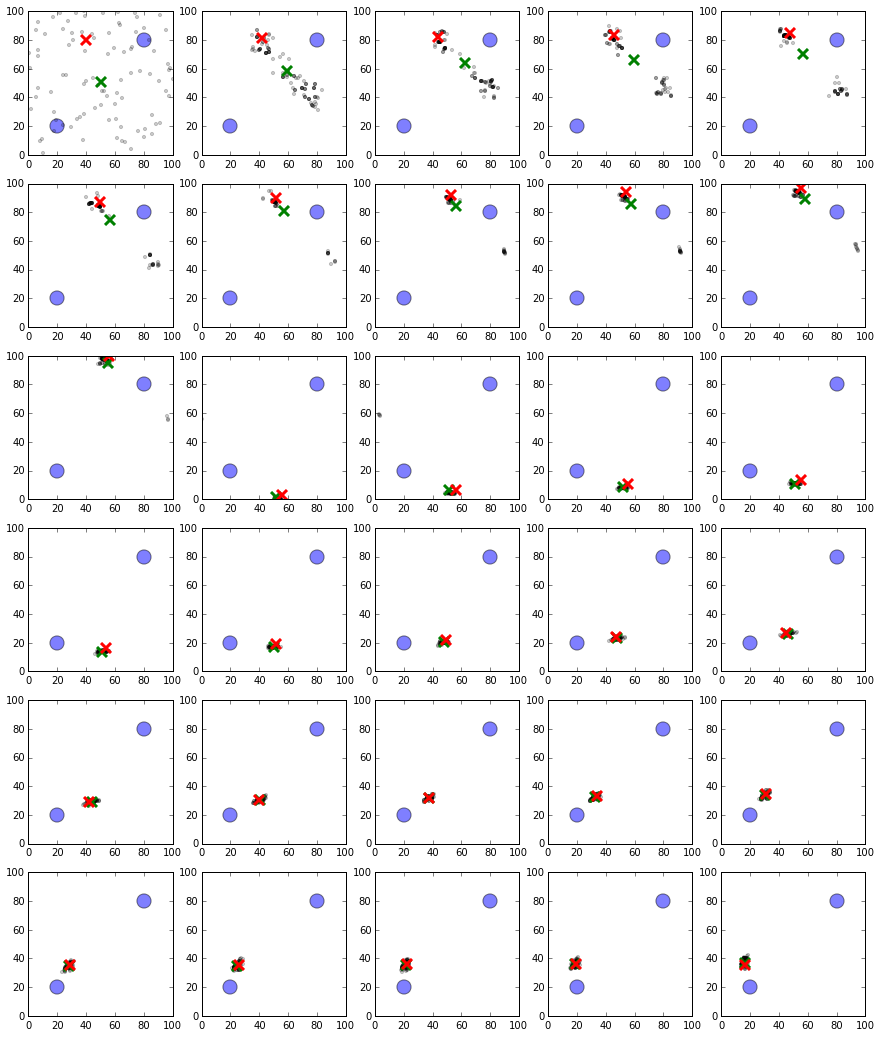

In [40]:
Image(filename='imgs/world-seq2.png')

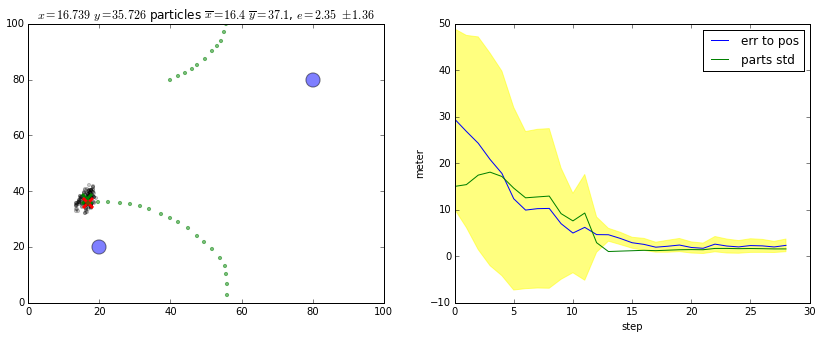

In [41]:
Image(filename='imgs/world-seq2-summary.png')